In [1]:
!pip install seaborn==0.11.1
!pip install wordcloud==1.8.1

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import ImageColorGenerator, STOPWORDS, WordCloud

In [2]:
courses_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv'
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv'

courses_df = pd.read_csv(courses_url)
ratings_df = pd.read_csv(ratings_url)

In [3]:
# COURSE CONTENT DATASET
courses_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [4]:
courses_df.shape[0]  # 307 unique courses

307

In [5]:
courses_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [6]:
courses_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [7]:
courses_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [8]:
titles = ' '.join(title for title in courses_df.TITLE.astype(str))  # coalesce course titles into single string
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [9]:
# filter stopwords
stopwords = set(STOPWORDS)  # filter doesn't work if set() run without 'STOPWORDS'
stopwords.update(['getting started', 'using', 'enabling', 'template', 'university', 'end', 'introduction', 'basic'])

In [10]:
# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400)
wordcloud.generate(titles)

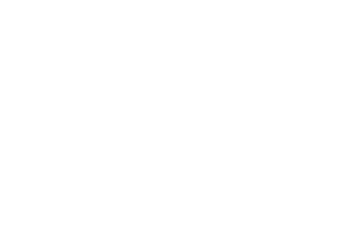

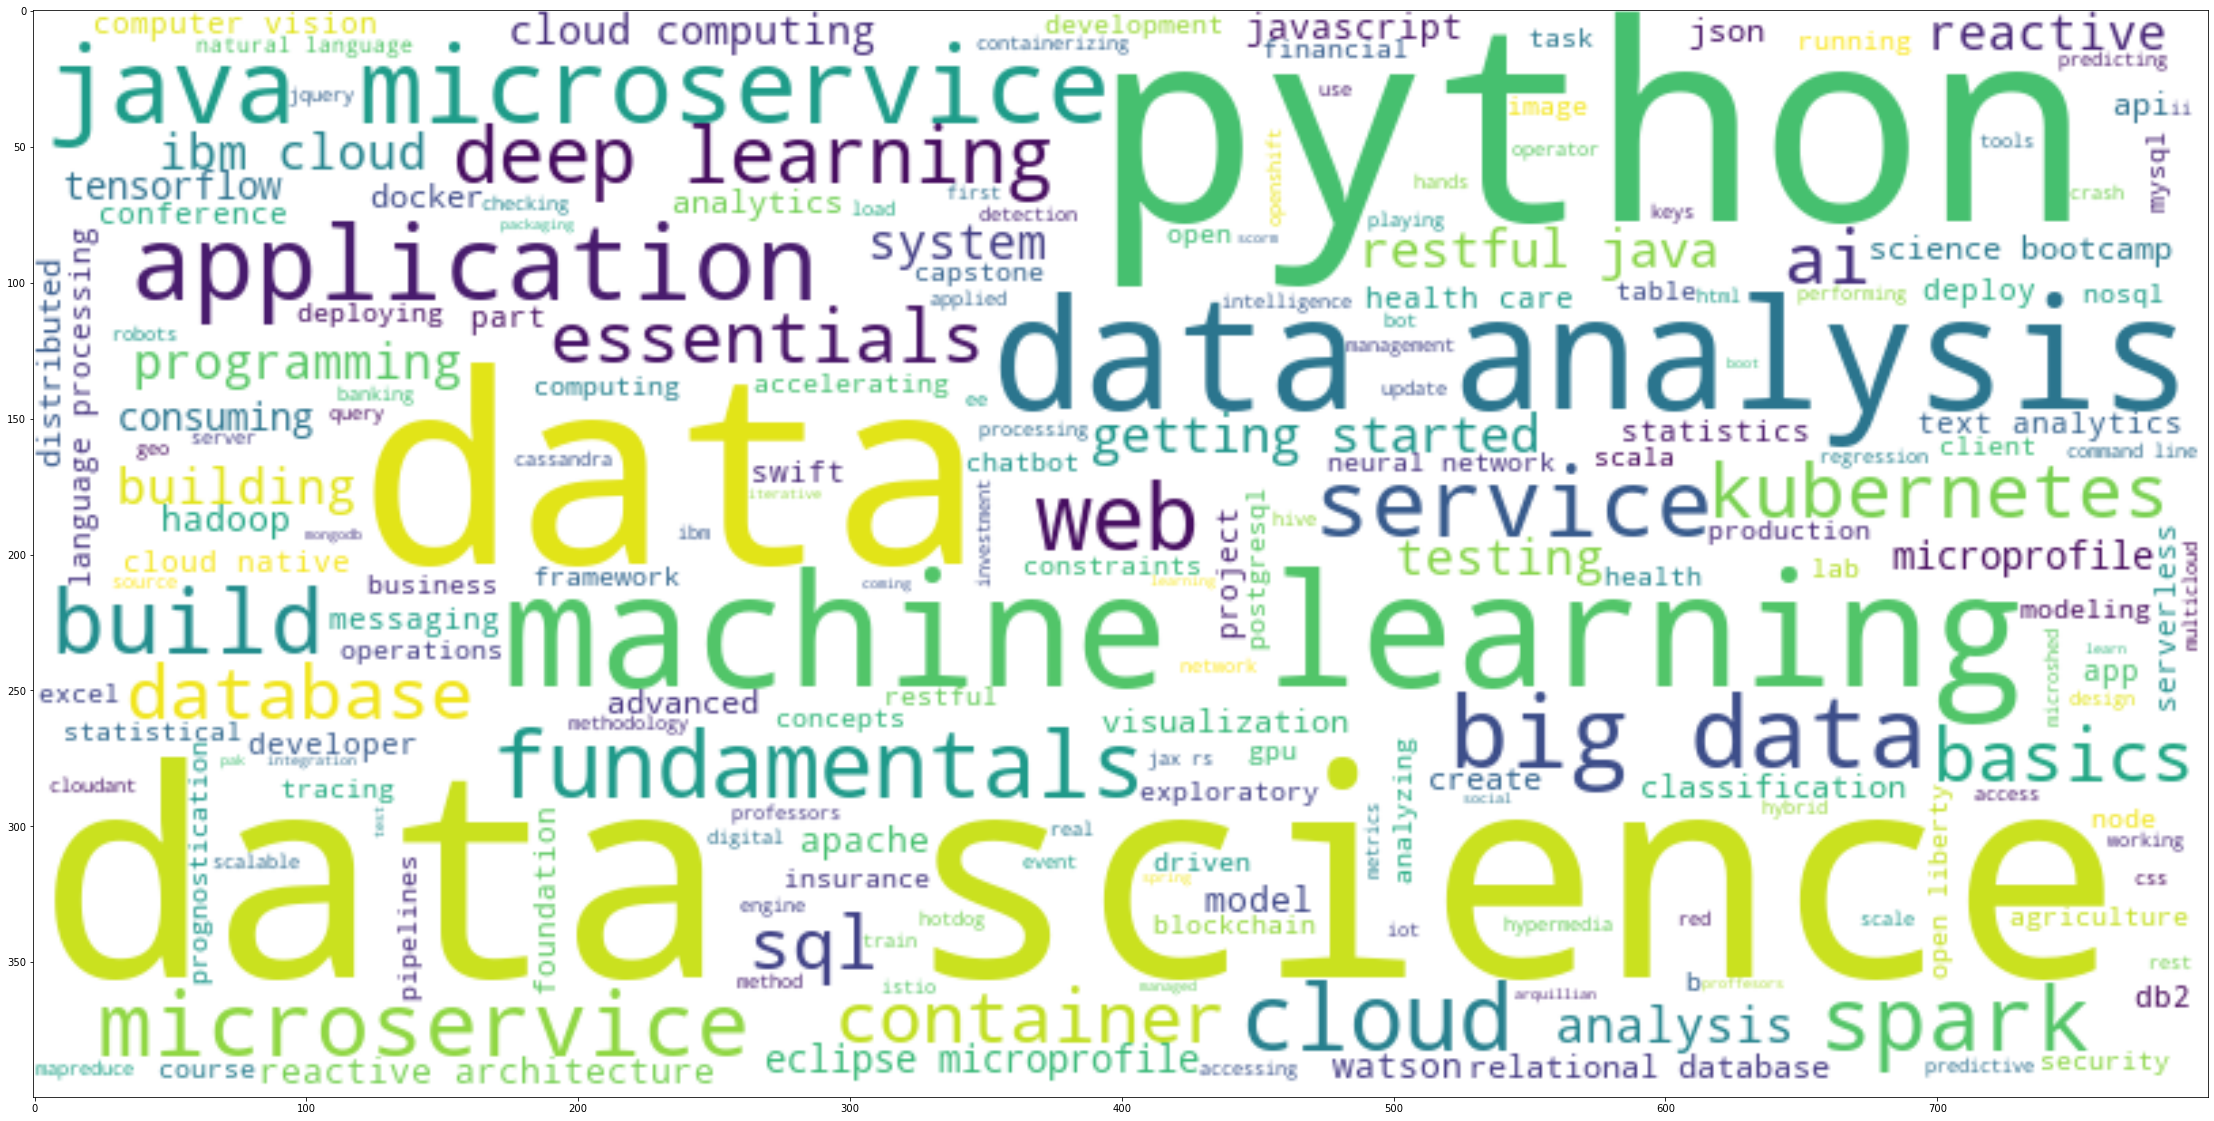

In [11]:
# visualise wordcloud
plt.axis('off')
plt.figure(figsize=(40, 20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [12]:
# find courses with MachineLearning == 1
ml_df = courses_df[courses_df.MachineLearning == 1]
ml_df.TITLE

1                    accelerating deep learning with gpu
15                                  data   ai essentials
19              ybrid cloud conference  ai pipelines lab
21                     data   ai  jumpstart your journey
24                    ai for everyone  master the basics
                             ...                        
274          convolutional neural networks in tensorflow
282                       machine learning with big data
290    natural language processing with attention models
291     natural language processing with sequence models
292    natural language processing with probabilistic...
Name: TITLE, Length: 69, dtype: object

In [13]:
# find courses with MachineLearning == 1 and BigData == 1
ml_bd_df = ml_df[ml_df.BigData == 1]
ml_bd_df.TITLE

46     insurance risk assessment with montecarlo meth...
59                               text analytics at scale
184                                          spark mllib
282                       machine learning with big data
Name: TITLE, dtype: object

In [14]:
genres = courses_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [15]:
courses_df.Python.value_counts()  # 279 non-Python courses, 28 Python courses

0    279
1     28
Name: Python, dtype: int64

In [16]:
genre_sums = courses_df[genres].sum(axis=0)
genre_sums  # BackendDev most popular genre; Chatbot, Blockchain least

Database           60
Python             28
CloudComputing     37
DataAnalysis       56
Containers         17
MachineLearning    69
ComputerVision     10
DataScience        38
BigData            36
Chatbot             4
R                  17
BackendDev         78
FrontendDev        19
Blockchain          4
dtype: int64

In [17]:
gs_df = pd.DataFrame(genre_sums, columns=['Count']).sort_values(by='Count', ascending=False)
gs_df

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


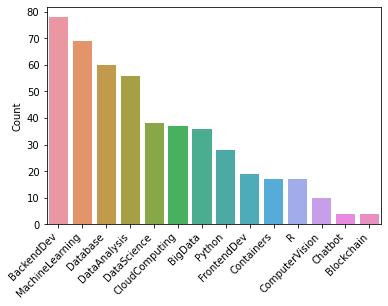

In [18]:
# plot course genre counts
plt.figure()
sns.barplot(x=gs_df.index, y='Count', data=gs_df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# COURSE ENROLMENTS DATASET
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [20]:
ratings_df.rating.unique()  # 2: user audited course without completing; 3: user completed course and earned certificate

array([3., 2.])

In [21]:
total = ratings_df.shape[0]
total  # 233,306 total enrolments

233306

In [22]:
user_rating_counts = ratings_df.groupby('user').rating.size()
print(user_rating_counts)

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Name: rating, Length: 33901, dtype: int64


In [23]:
user_rating_counts.size  # 33,901 users enrolled in 233,306 courses

33901

In [24]:
user_rating_counts.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
Name: rating, dtype: float64

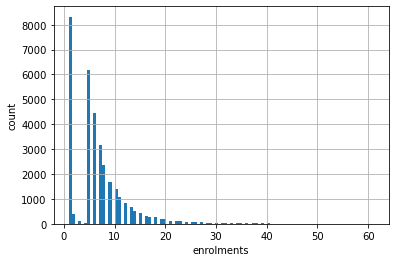

In [25]:
# plot course enrolment counts
plt.figure()
user_rating_counts.hist(bins=100)
plt.xlabel('enrolments')
plt.ylabel('count')
plt.show()

In [26]:
# aggregate enrolment ('rating') counts for each course ('item')
agg_df = ratings_df.groupby(['item']).size().reset_index()
agg_df.columns = ['Course', 'Enrolments']
agg_df = agg_df.sort_values(by='Enrolments', ascending=False).reset_index(drop=True)
agg_df

,Course,Enrolments
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
...,...,...
121,ST0201EN,1
122,ST0301EN,1
123,DX0106EN,1
124,DX0108EN,1


In [27]:
agg_df.head(20)  # view enrolment counts for top 20 courses

,Course,Enrolments
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [28]:
# check course names against enrolment counts
merge_df = pd.merge(courses_df[['COURSE_ID', 'TITLE']], agg_df, left_on='COURSE_ID', right_on='Course', how='right')
merge_df.columns = ['a', 'Course', 'b', 'Enrolments']
top_courses = merge_df[['Course', 'Enrolments']].head(20)
top_courses

,Course,Enrolments
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [29]:
top = top_courses.Enrolments.values.sum()
top  # 147,688 enrolments across top 20 courses

147688

In [30]:
print(f'Top 20 courses account for {round((top * 100) / total, 2)}% of all enrolments')

Top 20 courses account for 63.3% of all enrolments
